Visualization of convergence of WOA metaheuristics on test benchmarks:

Convergence visualization was carried out on 3 randomly selected benchmarks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

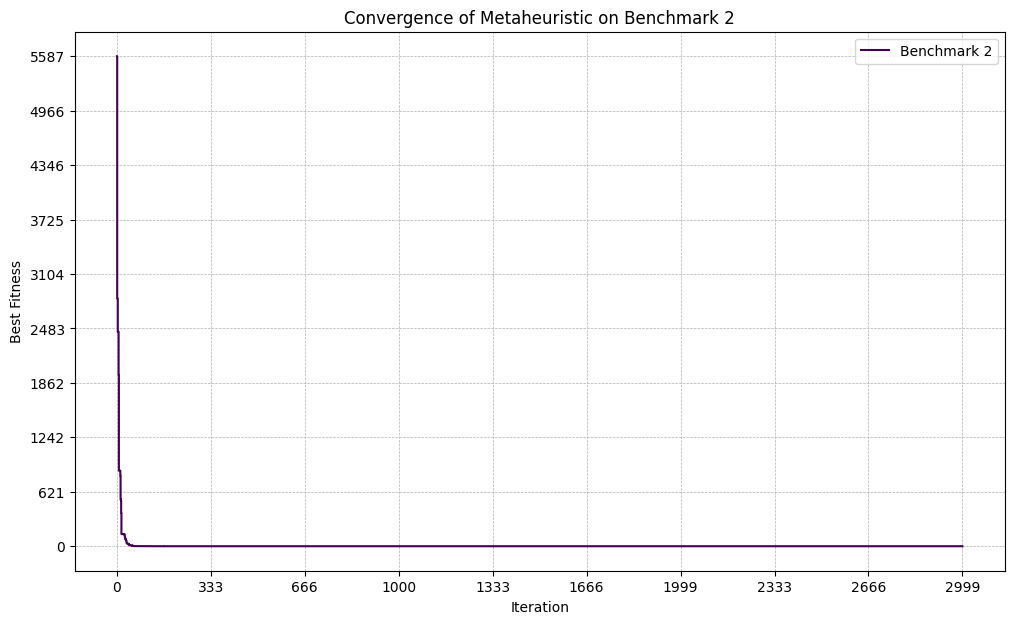

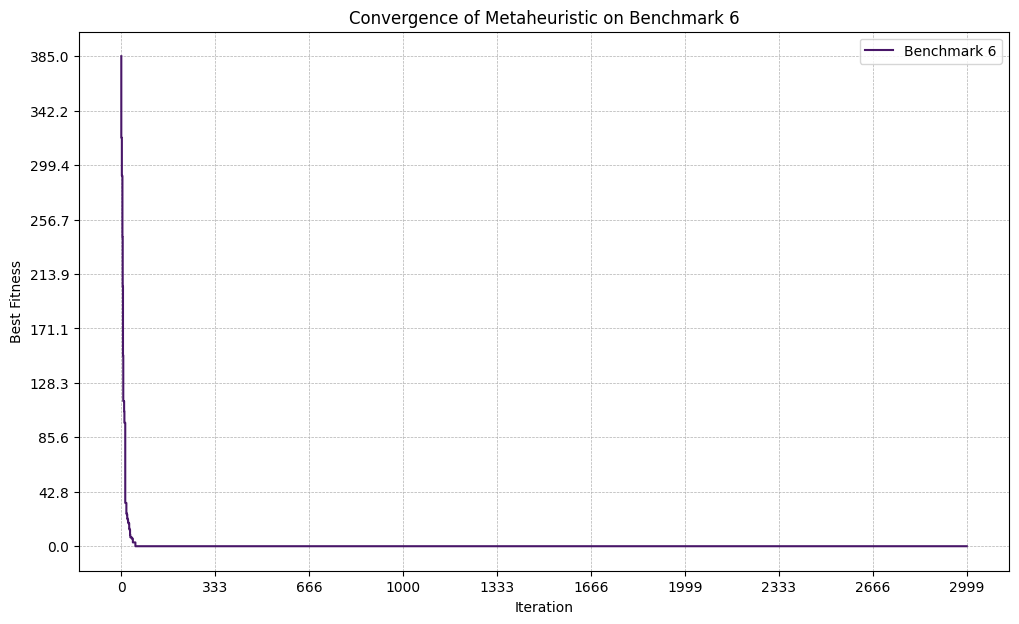

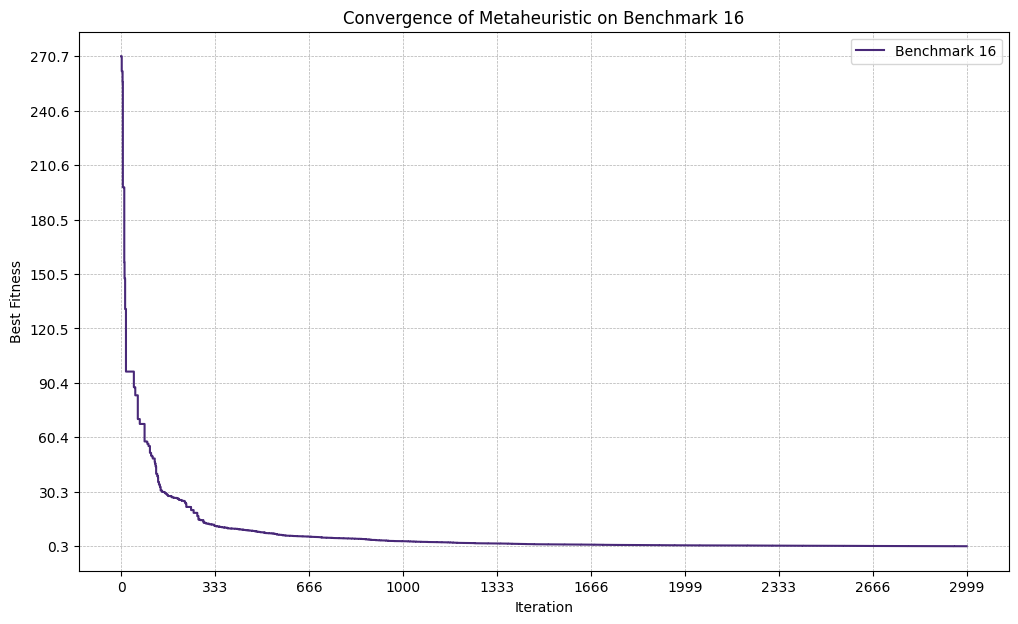

In [2]:
# Загрузка данных из файла
with open("results_.txt", "r") as f:
    lines = f.readlines()

# Структура для хранения данных
data = {
    'Benchmark': [],
    'Iteration': [],
    'Best Fitness': []
}

# Преобразование строк из файла в структурированные данные
for line in lines:
    if not line.startswith("Benchmark"):
        continue
    parts = line.split(":")
    benchmark = int(parts[0].split()[1].replace(',', ''))
    iteration = int(parts[0].split()[3])

    # Добавление проверки на корректность строки перед преобразованием
    try:
        fitness = float(parts[1].split("=")[-1].strip())
    except ValueError:
        print(f"Failed to parse line: {line}")
        continue

    data['Benchmark'].append(benchmark)
    data['Iteration'].append(iteration)
    data['Best Fitness'].append(fitness)

# Преобразование данных в DataFrame
df = pd.DataFrame(data)

# Создание цветовой карты для 19 бенчмарков
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1, 19)]

# Построение графиков для каждого бенчмарка
benchmarks = df['Benchmark'].unique()
for index, bm in enumerate(benchmarks):
    subset = df[df['Benchmark'] == bm]

    if subset['Best Fitness'].isnull().any() or subset['Iteration'].isnull().any():
        print(f"Skipping benchmark {bm} due to NaN values.")
        continue

    if (subset['Best Fitness'] == float("inf")).any() or (subset['Best Fitness'] == float("-inf")).any():
        print(f"Skipping benchmark {bm} due to Inf values.")
        continue

    plt.figure(figsize=(12, 7))
    plt.plot(subset['Iteration'], subset['Best Fitness'], label=f"Benchmark {bm}", color=colors[index])
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title(f"Convergence of Metaheuristic on Benchmark {bm}")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.xticks(np.linspace(min(subset['Iteration']), max(subset['Iteration']), 10))
    plt.yticks(np.linspace(min(subset['Best Fitness']), max(subset['Best Fitness']), 10))

    plt.show()